In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# включить отображение в блокноте
%matplotlib inline

In [12]:
WORKDIR = './names'
names_by_year = {}
names = ['Name', 'Gender', 'Count']
for year in range(1900, 2001, 1):
    names_by_year[year] = pd.read_csv(f'{WORKDIR}/yob{year}.txt', names=names)
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

In [21]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()

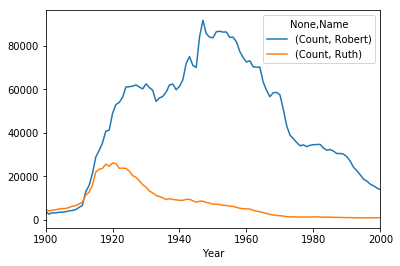

In [22]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot();


In [132]:
WORKDIR = './names'
names_by_year = {}
names = ['Name', 'Gender', 'Count']
for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv(f'{WORKDIR}/yob{year}.txt', names=names)
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

In [133]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
#name_dynamics.head(5)

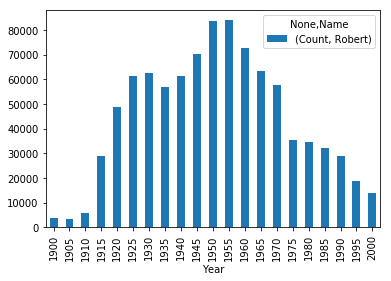

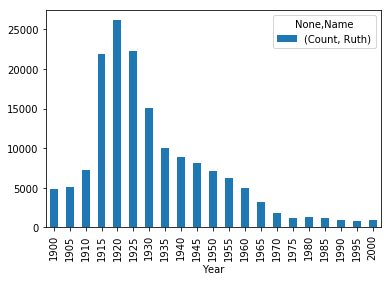

In [134]:
name_dynamics.query('Name == "Robert"').unstack('Name').plot.bar()
name_dynamics.query('Name == "Ruth"').unstack('Name').plot.bar()

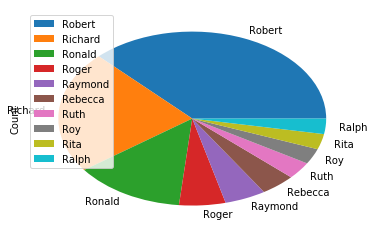

In [2]:
df = pd.read_csv('./names/yob1950.txt', names=['Name', 'Gender', 'Count'], index_col='Name')
df[df.index.str.startswith('R')].nlargest(10, 'Count').plot.pie(y='Count' );

In [3]:
WORKDIR = './names'
names_by_year = {}
names = ['Name', 'Gender', 'Count']
for year in range(1900, 2001, 1):
    names_by_year[year] = pd.read_csv(f'{WORKDIR}/yob{year}.txt', names=names)
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

In [4]:
def count_consonants(text):
    return sum(1 for char in text.lower() if char in "bcdfghjklmnpqrstvwxz")

In [7]:
data_cons = names_all.groupby('Name').sum().reset_index()
data_cons['Count_consonants'] = data_cons.Name.apply(count_consonants)
data_cons.head(3)

,Name,Count,Count_consonants
0,Aadam,58,2
1,Aadarsh,5,4
2,Aadil,80,2


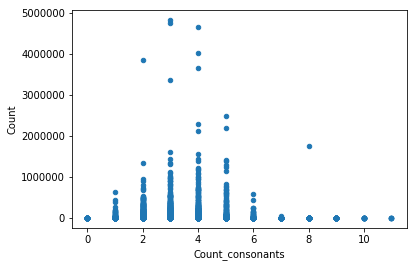

In [9]:
data_cons.plot.scatter(x='Count_consonants', y='Count');